In [6]:
import pandas as pd
import matplotlib.pyplot as plt

crimes_start = pd.read_excel('tableaux-4001-ts.xlsx')
crimes_start.drop("Index", axis=1, inplace=True)

crimes_start.to_csv('crimes-2000-2022.csv', index=False)

In [14]:
crimes = pd.read_csv('crimes-2000-2022.csv', index_col="libellé index")  

crimes = crimes.T

crimes = crimes.reset_index()
crimes

crimes['Annee'] = crimes['index'].map(lambda x: x.split('_')[1])
crimes['Mois'] = crimes['index'].map(lambda x: x.split('_')[2])
crimes

libellé index,index,Règlements de compte entre malfaiteurs,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Coups et blessures volontaires suivis de mort,Autres coups et blessures volontaires criminels ou correctionnels,Prises d'otages à l'occasion de vols,Prises d'otages dans un autre but,...,Index non utilisé,"Prix illicittes, publicité fausse et infractions aux règles de la concurrence",Achats et ventes sans factures,Infractions à l'exercice d'une profession règlementée,Infractions au droit de l'urbanisme et de la construction,Fraudes fiscales,Autres délits économiques et financiers,Autres délits,Annee,Mois
0,_2022_07,16,3,79,14,315,21,31959,12,21,...,0,77,4,103,335,53,1225,14573,2022,07
1,_2022_06,13,3,65,9,373,22,33028,10,19,...,0,80,6,131,352,68,1420,14416,2022,06
2,_2022_05,15,4,91,9,339,13,32977,9,16,...,0,94,4,133,391,61,1467,15128,2022,05
3,_2022_04,5,3,70,8,285,23,28293,6,22,...,0,115,2,98,422,73,1518,14258,2022,04
4,_2022_03,15,4,93,8,321,25,31034,17,23,...,0,84,4,110,500,86,1795,16172,2022,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,_2000_05,5,4,77,14,106,22,10079,4,3,...,0,50,26,65,166,43,180,6456,2000,05
267,_2000_04,2,7,76,5,63,16,7980,6,2,...,0,81,40,77,209,40,188,5975,2000,04
268,_2000_03,9,6,70,9,104,17,9427,6,2,...,0,72,39,64,174,50,191,7039,2000,03
269,_2000_02,5,5,96,10,91,12,8391,3,2,...,0,56,68,86,176,44,154,6557,2000,02


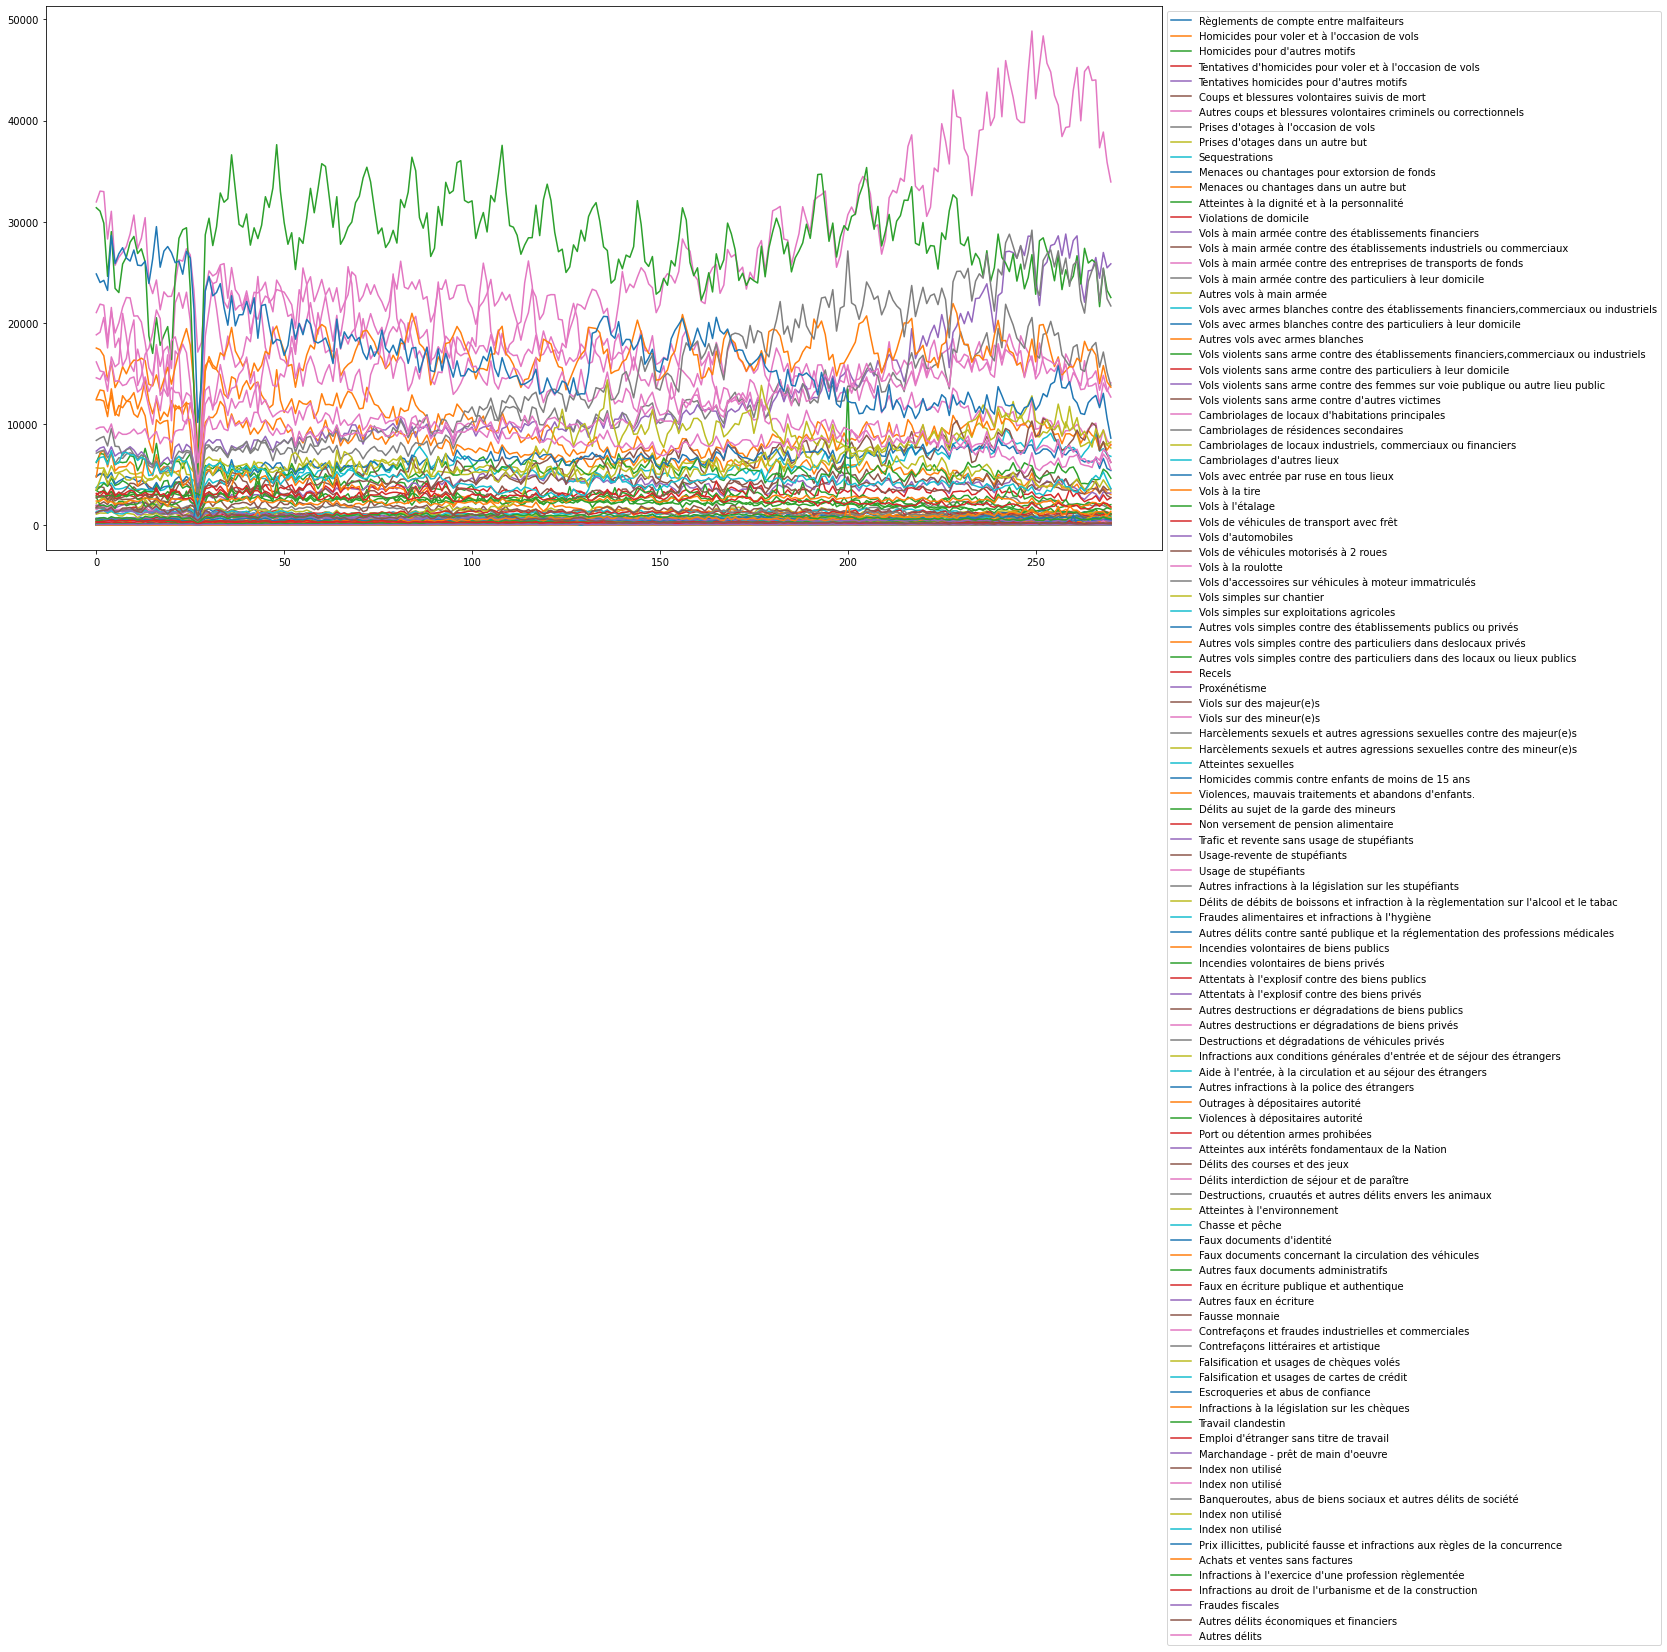

In [8]:
crimes.plot(figsize=(20,10)).legend(bbox_to_anchor=(1.0, 1.0))

In [9]:
import plotly.express as px
from plotly import graph_objects as go

DF4 = crimes.groupby(['Annee'])[["Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s", "Viols sur des mineur(e)s",
                                'Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s', 'Viols sur des majeur(e)s',
                              ]].sum().reset_index()

labels = DF4['Annee']
harcèlementsMineur = DF4['Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s']
harcèlementsMajeur = DF4['Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s']


data = {
    "Harcèlements_mineur": harcèlementsMineur,
    "Harcèlements_majeur": harcèlementsMajeur,
    "Viols_mineur": DF4['Viols sur des mineur(e)s'],
    "Viols_majeur": DF4['Viols sur des majeur(e)s']
,
    "labels": labels
}

fig1 = go.Figure(
    data = [
        go.Bar(
            name="Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s",
            x=data["labels"],
            y=data["Harcèlements_mineur"],
            offsetgroup=0,
        ),
        go.Bar(
            name="Viols mineur(e)s",
            x=data["labels"],
            y=data["Viols_mineur"],
            offsetgroup=0,
        ),
        go.Bar(
            name="Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s",
            x=data["labels"],
            y=data["Harcèlements_majeur"],
            offsetgroup=1,
        ),
        go.Bar(
            name="Viols majeur(e)s",
            x=data["labels"],
            y=data["Viols_majeur"],
            offsetgroup=1,
        ),

    ],
    layout=go.Layout(
        title="Crimes sexuel en france",
        yaxis_title="Nombres de delits"
    )
)
fig1.show()

In [10]:
fig1 = go.Figure(
    data = [
        go.Bar(
            name="Viols mineur(e)s",
            x=data["labels"],
            y=data["Viols_mineur"],
            offsetgroup=0,
        ),
        go.Bar(
            name="Viols majeur(e)s",
            x=data["labels"],
            y=data["Viols_majeur"],
            offsetgroup=1,
        ),

    ],
    layout=go.Layout(
        title="Crimes sexuel en france",
        yaxis_title="Nombres de delits"
    )
)
fig1.show()

In [11]:
data = {
    "Harcèlements_mineur": harcèlementsMineur,
    "Harcèlements_majeur": harcèlementsMajeur,
    "Viols_mineur": DF4['Viols sur des mineur(e)s'],
    "Viols_majeur": DF4['Viols sur des majeur(e)s']
,
    "Annee": labels
}

data2 = data["Harcèlements_majeur"] + data["Harcèlements_mineur"]

fig = go.Figure(px.line(data, x="Annee", y=data["Harcèlements_majeur"] + data["Harcèlements_mineur"],
              hover_data={"Annee"},title='Harcèlement et agressions sexuelles en France'))


fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

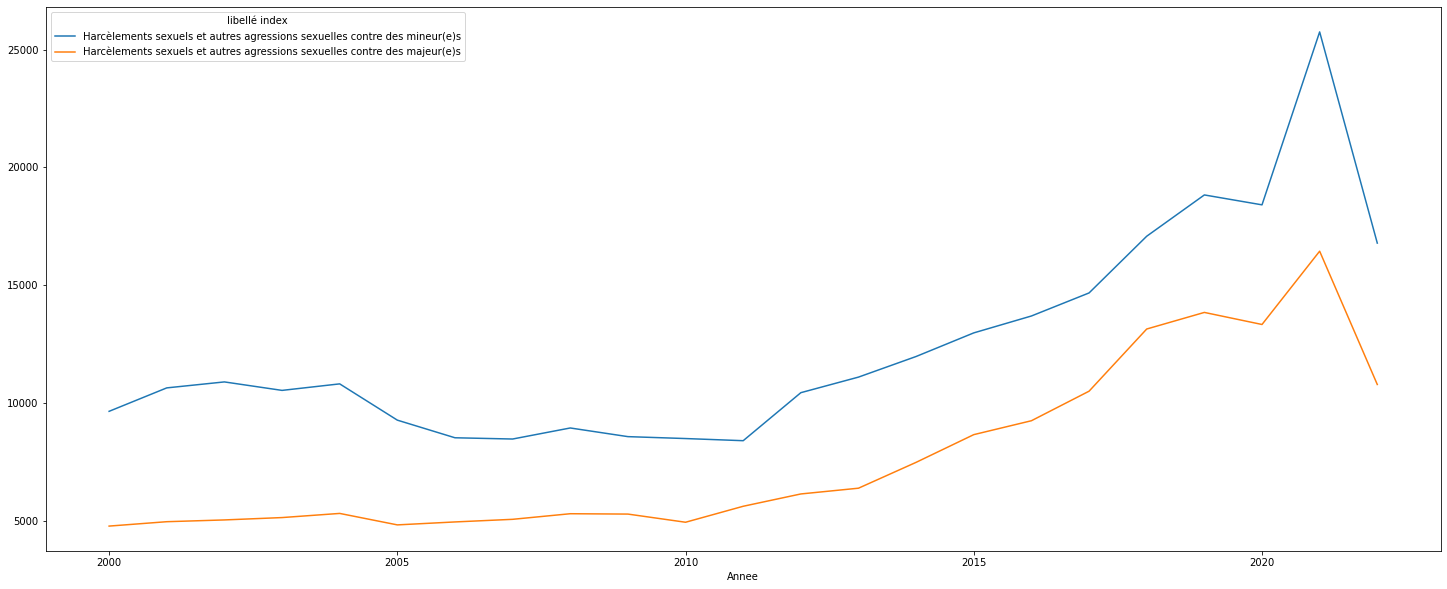

In [12]:
crimes2 = crimes.groupby(['Annee'])[["Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s", 'Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s', ]].sum()
DF5_sorted = crimes2.sort_values(by='Annee', ascending=False).head(60)
DF5_sorted.sort_values(by='Annee', ascending=True).plot(figsize=(25, 10))

In [87]:
DF5 = crimes.groupby(['Annee'])[["Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s",
                                'Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s'
                              ]].sum().reset_index()
DF5.head(5)

libellé index,Annee,Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s
0,2000,9667,4803
1,2001,10660,4989
2,2002,10913,5064
3,2003,10554,5164
4,2004,10830,5340


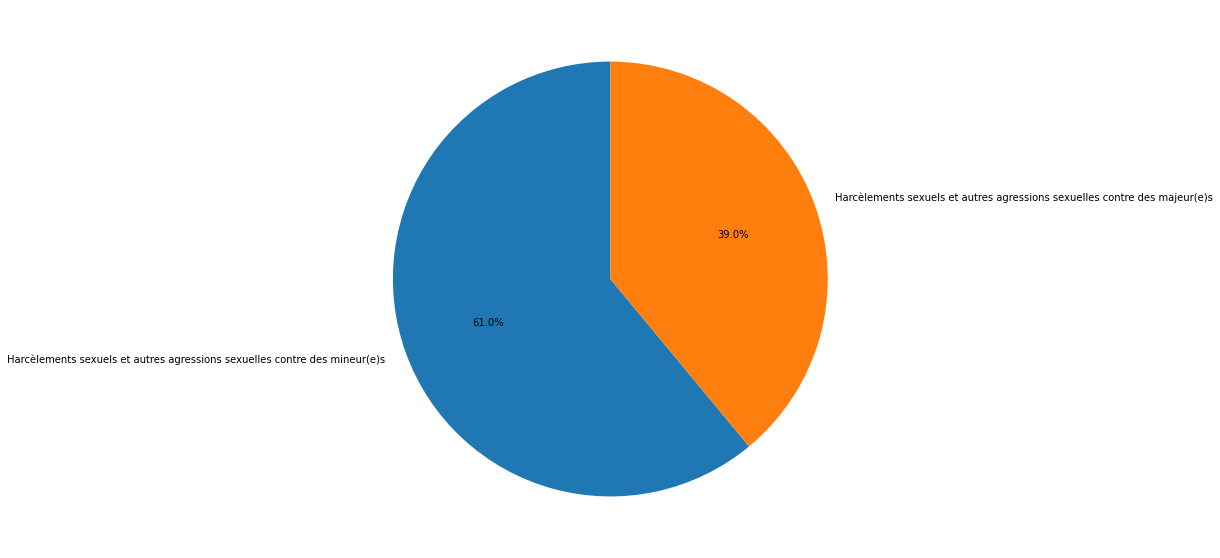

In [88]:
plt.rcParams["figure.figsize"] = (20,10)
DF5 = DF5.loc[DF4['Annee'] == '2021'].T
DF5.drop("Annee", axis=0, inplace=True)
DF6 = DF5.reset_index()

labels = DF6["libellé index"]
counts = DF6[21]

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%',startangle=90)


plt.show()

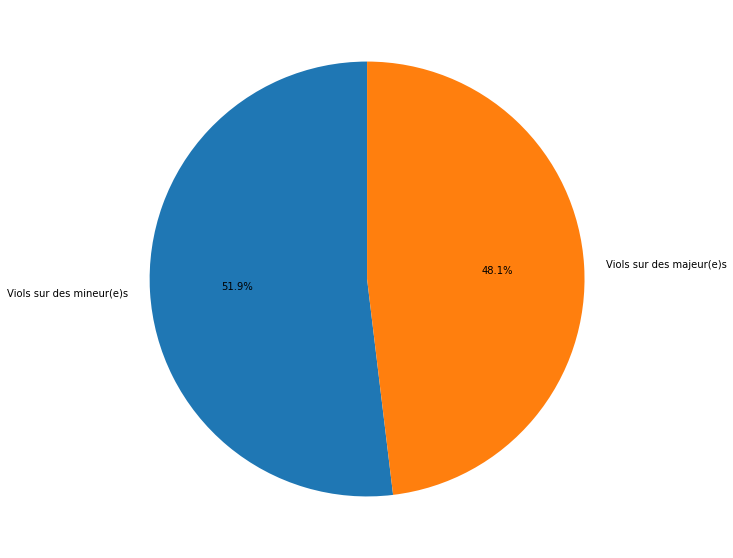

In [89]:
DF7 = crimes.groupby(['Annee'])[["Viols sur des mineur(e)s",'Viols sur des majeur(e)s',]].sum().reset_index()
DF7 = DF7.loc[DF7['Annee'] == '2021'].T

DF7.drop("Annee", axis=0, inplace=True)
DF7 = DF7.reset_index()

labels = DF7["libellé index"]
counts = DF7[21]

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%',startangle=90)


plt.show()